In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index('iso_code', inplace=True)



In [2]:
covidtotals.corr(method='pearson', numeric_only=True)

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds,vac_per_hund,aged_65_older,life_expectancy,hum_dev_ind
total_cases,1.000000,0.762998,0.100913,0.146426,0.695625,-0.025125,0.286093,0.192044,0.209188,0.022744,0.289166,0.187538,0.262988
total_deaths,0.762998,1.000000,0.009450,0.274146,0.466781,-0.040507,0.190973,0.125461,0.049745,-0.067747,0.187938,0.113417,0.205922
total_cases_pm,0.100913,0.009450,1.000000,0.440847,-0.132456,0.193272,0.744676,0.661983,0.478298,0.236557,0.720898,0.689163,0.755971
total_deaths_pm,0.146426,0.274146,0.440847,1.000000,-0.071914,0.022683,0.686996,0.289267,0.389162,-0.066557,0.680160,0.490990,0.600523
population,0.695625,0.466781,-0.132456,-0.071914,1.000000,-0.018658,0.025210,-0.049733,-0.043710,-0.108475,-0.008001,-0.036341,-0.018794
pop_density,-0.025125,-0.040507,0.193272,0.022683,-0.018658,1.000000,0.141228,0.294381,0.314577,0.086055,0.065962,0.195529,0.142220
median_age,0.286093,0.190973,0.744676,0.686996,0.025210,0.141228,1.000000,0.650598,0.662467,0.522043,0.915523,0.829922,0.896464
gdp_per_capita,0.192044,0.125461,0.661983,0.289267,-0.049733,0.294381,0.650598,1.000000,0.296186,0.667232,0.510856,0.680024,0.749490
hosp_beds,0.209188,0.049745,0.478298,0.389162,-0.043710,0.314577,0.662467,0.296186,1.000000,-0.077593,0.652752,0.455798,0.565411
vac_per_hund,0.022744,-0.067747,0.236557,-0.066557,-0.108475,0.086055,0.522043,0.667232,-0.077593,1.000000,0.347831,0.670826,0.514868


In [3]:
covidtotals['total_cases_q'] = pd.qcut(covidtotals['total_cases'], labels=['very low', 'low', 'medium', 'high', 'very high'], q=5, precision=0)
covidtotals['total_deaths_q'] = pd.qcut(covidtotals['total_deaths'], labels=['very low', 'low', 'medium', 'high', 'very high'], q=5, precision=0)
pd.crosstab(covidtotals['total_cases_q'], covidtotals['total_deaths_q'])


total_deaths_q,very low,low,medium,high,very high
total_cases_q,,,,,
very low,36,10,1,0,0
low,11,26,8,1,0
medium,0,9,27,10,0
high,0,1,8,31,6
very high,0,0,2,4,40


In [4]:
covidtotals.loc[(covidtotals.total_cases_q == 'high') & (covidtotals.total_deaths_q == 'low')].T

iso_code,QAT
lastdate,2023-06-25
location,Qatar
total_cases,514524.0
total_deaths,690.0
total_cases_pm,190908.716
total_deaths_pm,256.017
population,2695131
pop_density,227.322
median_age,31.9
gdp_per_capita,116935.6


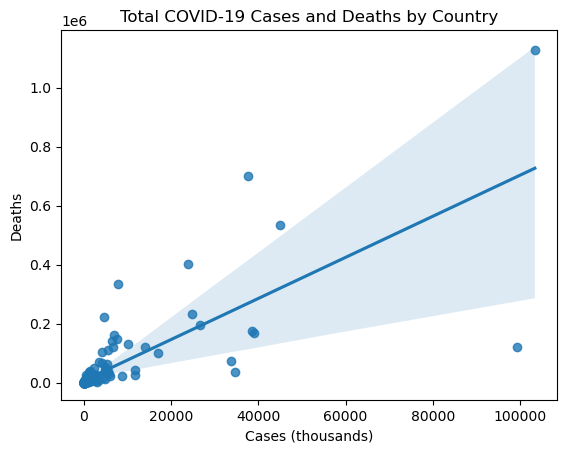

In [5]:
ax = sns.regplot(x=covidtotals.total_cases/1000, y=covidtotals.total_deaths)
ax.set(xlabel='Cases (thousands)', ylabel='Deaths', title='Total COVID-19 Cases and Deaths by Country')
plt.show()



In [7]:
covidtotals.loc[(covidtotals.total_cases<40000000) & (covidtotals.total_deaths>400000)].T

iso_code,BRA,RUS
lastdate,2023-10-01,2024-01-28
location,Brazil,Russia
total_cases,37519960.0,23774451.0
total_deaths,702116.0,401884.0
total_cases_pm,174257.347,164286.552
total_deaths_pm,3260.901,2777.105
population,215313504,144713312
pop_density,25.04,8.823
median_age,33.5,39.6
gdp_per_capita,14103.452,24765.954


In [8]:
covidtotals.loc[(covidtotals.total_cases>30000000) & (covidtotals.total_deaths<100000)].T

iso_code,JPN,KOR
lastdate,2023-05-14,2023-09-10
location,Japan,South Korea
total_cases,33803572.0,34571873.0
total_deaths,74694.0,35934.0
total_cases_pm,272715.688,667207.062
total_deaths_pm,602.606,693.495
population,123951696,51815808
pop_density,347.778,527.967
median_age,48.2,43.4
gdp_per_capita,39002.223,35938.374


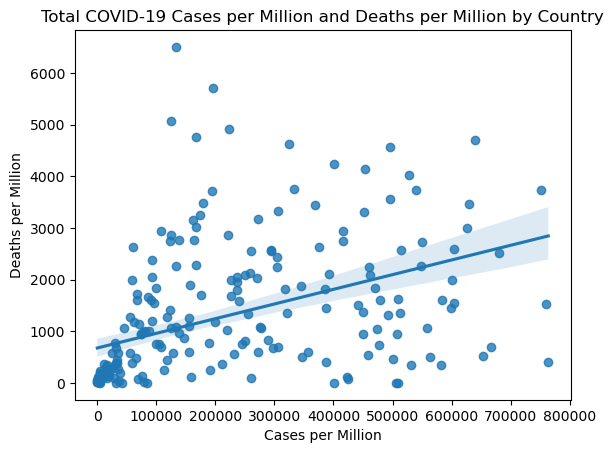

In [9]:
ax = sns.regplot(x='total_cases_pm', y='total_deaths_pm', data=covidtotals)
ax.set(xlabel='Cases per Million', ylabel='Deaths per Million', title='Total COVID-19 Cases per Million and Deaths per Million by Country')
plt.show()
